# Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.simplefilter('ignore')
import numpy as np 
from sklearn.impute import SimpleImputer

# Read file using pandas

In [2]:
df=pd.read_csv(r"data.csv")
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


# Describe the data (calculate mean,std, min ,max )

In [3]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# check missing values in columns

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# Count occurence of values

In [6]:
df['x1'].value_counts()

-118.366669    8
 31.633331     6
 30.633331     5
 78.633331     5
-86.366669     5
              ..
 58.434396     1
 18.408090     1
-99.593049     1
-72.501026     1
 54.003740     1
Name: x1, Length: 1887, dtype: int64

# Deal with missing values using Simple Imputer in scikit or fillna function in pandas

In [7]:
m=SimpleImputer(missing_values=np.nan, strategy='mean')
df['x1']=m.fit_transform(df[['x1']])
df['x1']

0      -119.366669
1      -101.108044
2      -130.278658
3      -114.703415
4      -119.366669
           ...    
2222     98.714112
2223     96.633331
2224     85.673940
2225     78.958862
2226    109.624009
Name: x1, Length: 2227, dtype: float64

In [8]:
df['x1']=df['x1'].fillna(df['x1'].mean())
df['x1']

0      -119.366669
1      -101.108044
2      -130.278658
3      -114.703415
4      -119.366669
           ...    
2222     98.714112
2223     96.633331
2224     85.673940
2225     78.958862
2226    109.624009
Name: x1, Length: 2227, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [10]:
df['x2'].value_counts()

-55.000000     7
-113.000000    7
 115.000000    6
-119.000000    6
 126.000000    6
              ..
-126.943566    1
-130.800339    1
-114.715946    1
-80.804223     1
 12.982108     1
Name: x2, Length: 1884, dtype: int64

In [11]:
m=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['x2']=m.fit_transform(df[['x2']])
df['x2']

0       1.150000e+02
1       9.777716e+01
2       1.067677e+02
3       1.011955e+02
4       1.150000e+02
            ...     
2222    8.964312e+01
2223    9.100000e+01
2224    1.038393e+02
2225    7.860537e+01
2226    1.000000e+08
Name: x2, Length: 2227, dtype: float64

In [12]:
df['x2']=df['x2'].fillna(df['x2'].mode())
df['x2']

0       1.150000e+02
1       9.777716e+01
2       1.067677e+02
3       1.011955e+02
4       1.150000e+02
            ...     
2222    8.964312e+01
2223    9.100000e+01
2224    1.038393e+02
2225    7.860537e+01
2226    1.000000e+08
Name: x2, Length: 2227, dtype: float64

# Detect Outliers

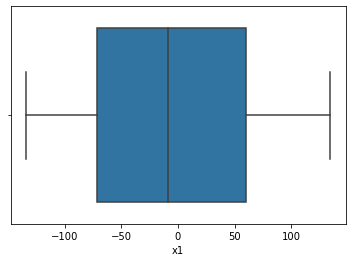

In [13]:
sn.boxplot(df['x1'])

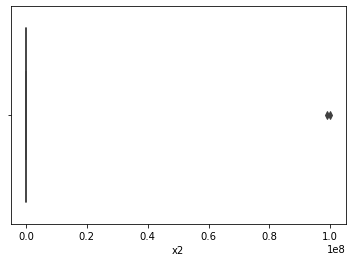

In [14]:
sn.boxplot(df['x2'])

# MODELS

# Logistic Regression


In [15]:
x=df[['x1','x2']]
y=df['y']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [18]:
yp=l.predict(x_test)

In [19]:
l.score(x_train,y_train)

0.5777653003930376

In [20]:
l.score(x_test,y_test)

0.5919282511210763

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,yp)
cm

array([[195,  47],
       [135,  69]], dtype=int64)

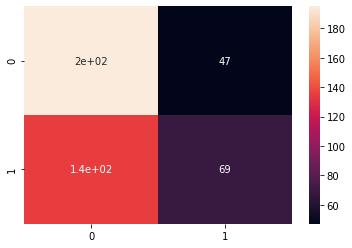

In [22]:
sn.heatmap(cm,annot=True)

# SVM with Linear Kernel


In [23]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
yp1=svm.predict(x_test)

In [25]:
svm.score(x_train,y_train)

0.5614823133071308

In [26]:
svm.score(x_test,y_test)

0.5426008968609866

In [27]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,yp1)
cm1

array([[242,   0],
       [204,   0]], dtype=int64)

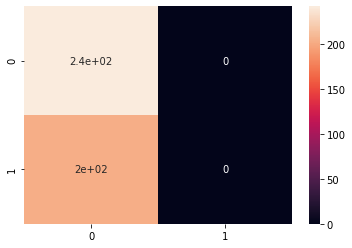

In [28]:
sn.heatmap(cm1,annot=True)

# SVM with RBF Kernel

In [29]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf')
svm1.fit(x_train,y_train)

SVC()

In [30]:
yp2=svm.predict(x_test)

In [31]:
svm1.score(x_train,y_train)

0.5614823133071308

In [32]:
svm1.score(x_test,y_test)

0.5426008968609866

In [33]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,yp2)
cm2

array([[242,   0],
       [204,   0]], dtype=int64)

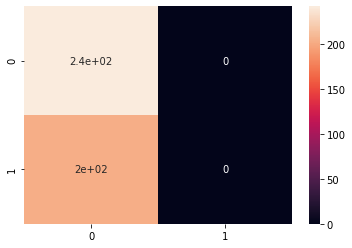

In [34]:
sn.heatmap(cm2,annot=True)

# Decision Tree


In [35]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
yp3=dec.predict(x_test)
yp3

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

In [37]:
dec.score(x_test,y_test)

0.9304932735426009

In [38]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,yp3)
cm3

array([[230,  12],
       [ 19, 185]], dtype=int64)

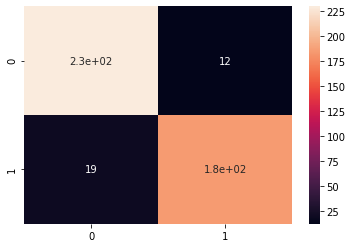

In [39]:
sn.heatmap(cm3,annot=True)

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
classifier.score(x_test,y_test)

0.9461883408071748

In [43]:
classifier

KNeighborsClassifier(n_neighbors=3)

In [44]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,y_pred)
cm4

array([[231,  11],
       [ 13, 191]], dtype=int64)

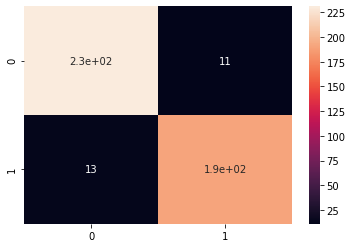

In [45]:
sn.heatmap(cm4,annot=True)

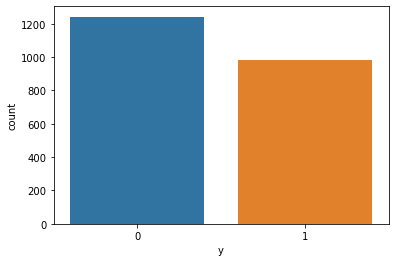

In [46]:
sn.countplot(df['y'])

# Compare all the models
Decision Tree is best from all other models because accuracy score is good as compare to Logistic Regression
,SVM with Linear Kernel,SVM with RBF Kernel.The accuracy score of Decision tree is 93%.
KNN also has good accuracy.But for this data decision tree model is best fit because we have supervised data and 
knn is used for unsupervised data.
Decision trees have easy to use features to identify the most significant dimensions, handle missing values, and deal with outliers

